# Requirements

# Imports

In [45]:
from datasets import load_dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Chargement des données et pré-traitement

In [46]:
df = pd.read_csv('clean.csv')
numeric_df = df.select_dtypes(include=[np.number])

In [47]:
numeric_df.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'gender_F', 'gender_M', 'gender_Unknown',
       'region_category_City', 'region_category_Town',
       'region_category_Village', 'joined_through_referral_?',
       'joined_through_referral_No', 'joined_through_referral_Yes',
       'used_special_discount_No', 'used_special_discount_Yes',
       'offer_application_preference_No', 'offer_application_preference_Yes',
       'past_complaint_No', 'past_complaint_Yes',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'feedback_No reason specified', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
   

In [48]:
df.columns

Index(['age', 'security_no', 'joining_date', 'referral_id', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score',
       'gender_F', 'gender_M', 'gender_Unknown', 'region_category_City',
       'region_category_Town', 'region_category_Village',
       'joined_through_referral_?', 'joined_through_referral_No',
       'joined_through_referral_Yes', 'used_special_discount_No',
       'used_special_discount_Yes', 'offer_application_preference_No',
       'offer_application_preference_Yes', 'past_complaint_No',
       'past_complaint_Yes', 'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'feedback_No reason specified', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback

In [49]:
# df = df.replace({"F": -1, "M": 1})
# df = df.replace({"Unknown": 0})
scaler = MinMaxScaler()
for column in numeric_df.columns:
    x = numeric_df[[column]].values
    x_scaled = scaler.fit_transform(x)
    numeric_df[column] = x_scaled


numeric_df.head()
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# reading_scores = df["reading_score"].values.reshape(-1, 1)
# writing_scores = df["writing_score"].values.reshape(-1, 1)
# On applique une normalisation MinMax pour que les colonnes aient les mêmes poids.
# df['reading_score'] = scaler.fit_transform(reading_scores)
# df['writing_score'] = scaler.fit_transform(writing_scores)


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_F,gender_M,gender_Unknown,...,internet_option_Wi-Fi,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,0.148148,0.64,0.098333,0.526717,0.547827,0.375887,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.629630,0.52,0.169265,0.204074,0.592988,0.239624,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.500000,0.40,0.016927,0.246577,0.448473,0.272092,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.388889,0.76,0.036627,0.238950,0.538795,0.318344,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.055556,0.88,0.142100,0.132013,0.611052,0.347050,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
num_corr = numeric_df.corr()
num_corr['churn_risk_score']
sorted_correlated = num_corr.map(lambda x: abs(x)).sort_values('churn_risk_score', ascending=False)['churn_risk_score'][:10]
sorted_correlated

reduced_df = df[["churn_risk_score", "points_in_wallet", "avg_transaction_value", "avg_frequency_login_days", "complaint_status_Unsolved", "feedback_Reasonable Price", "days_since_last_login"]]

# Matrice de Corrélation

Essayons d'abord de comprendre comment sont corrélés nos attributs d'entrée dans notre dataset.
On note pas de grande redondance entre nos informations, éventuellement au niveau de l'attribut "has completed preparation test"

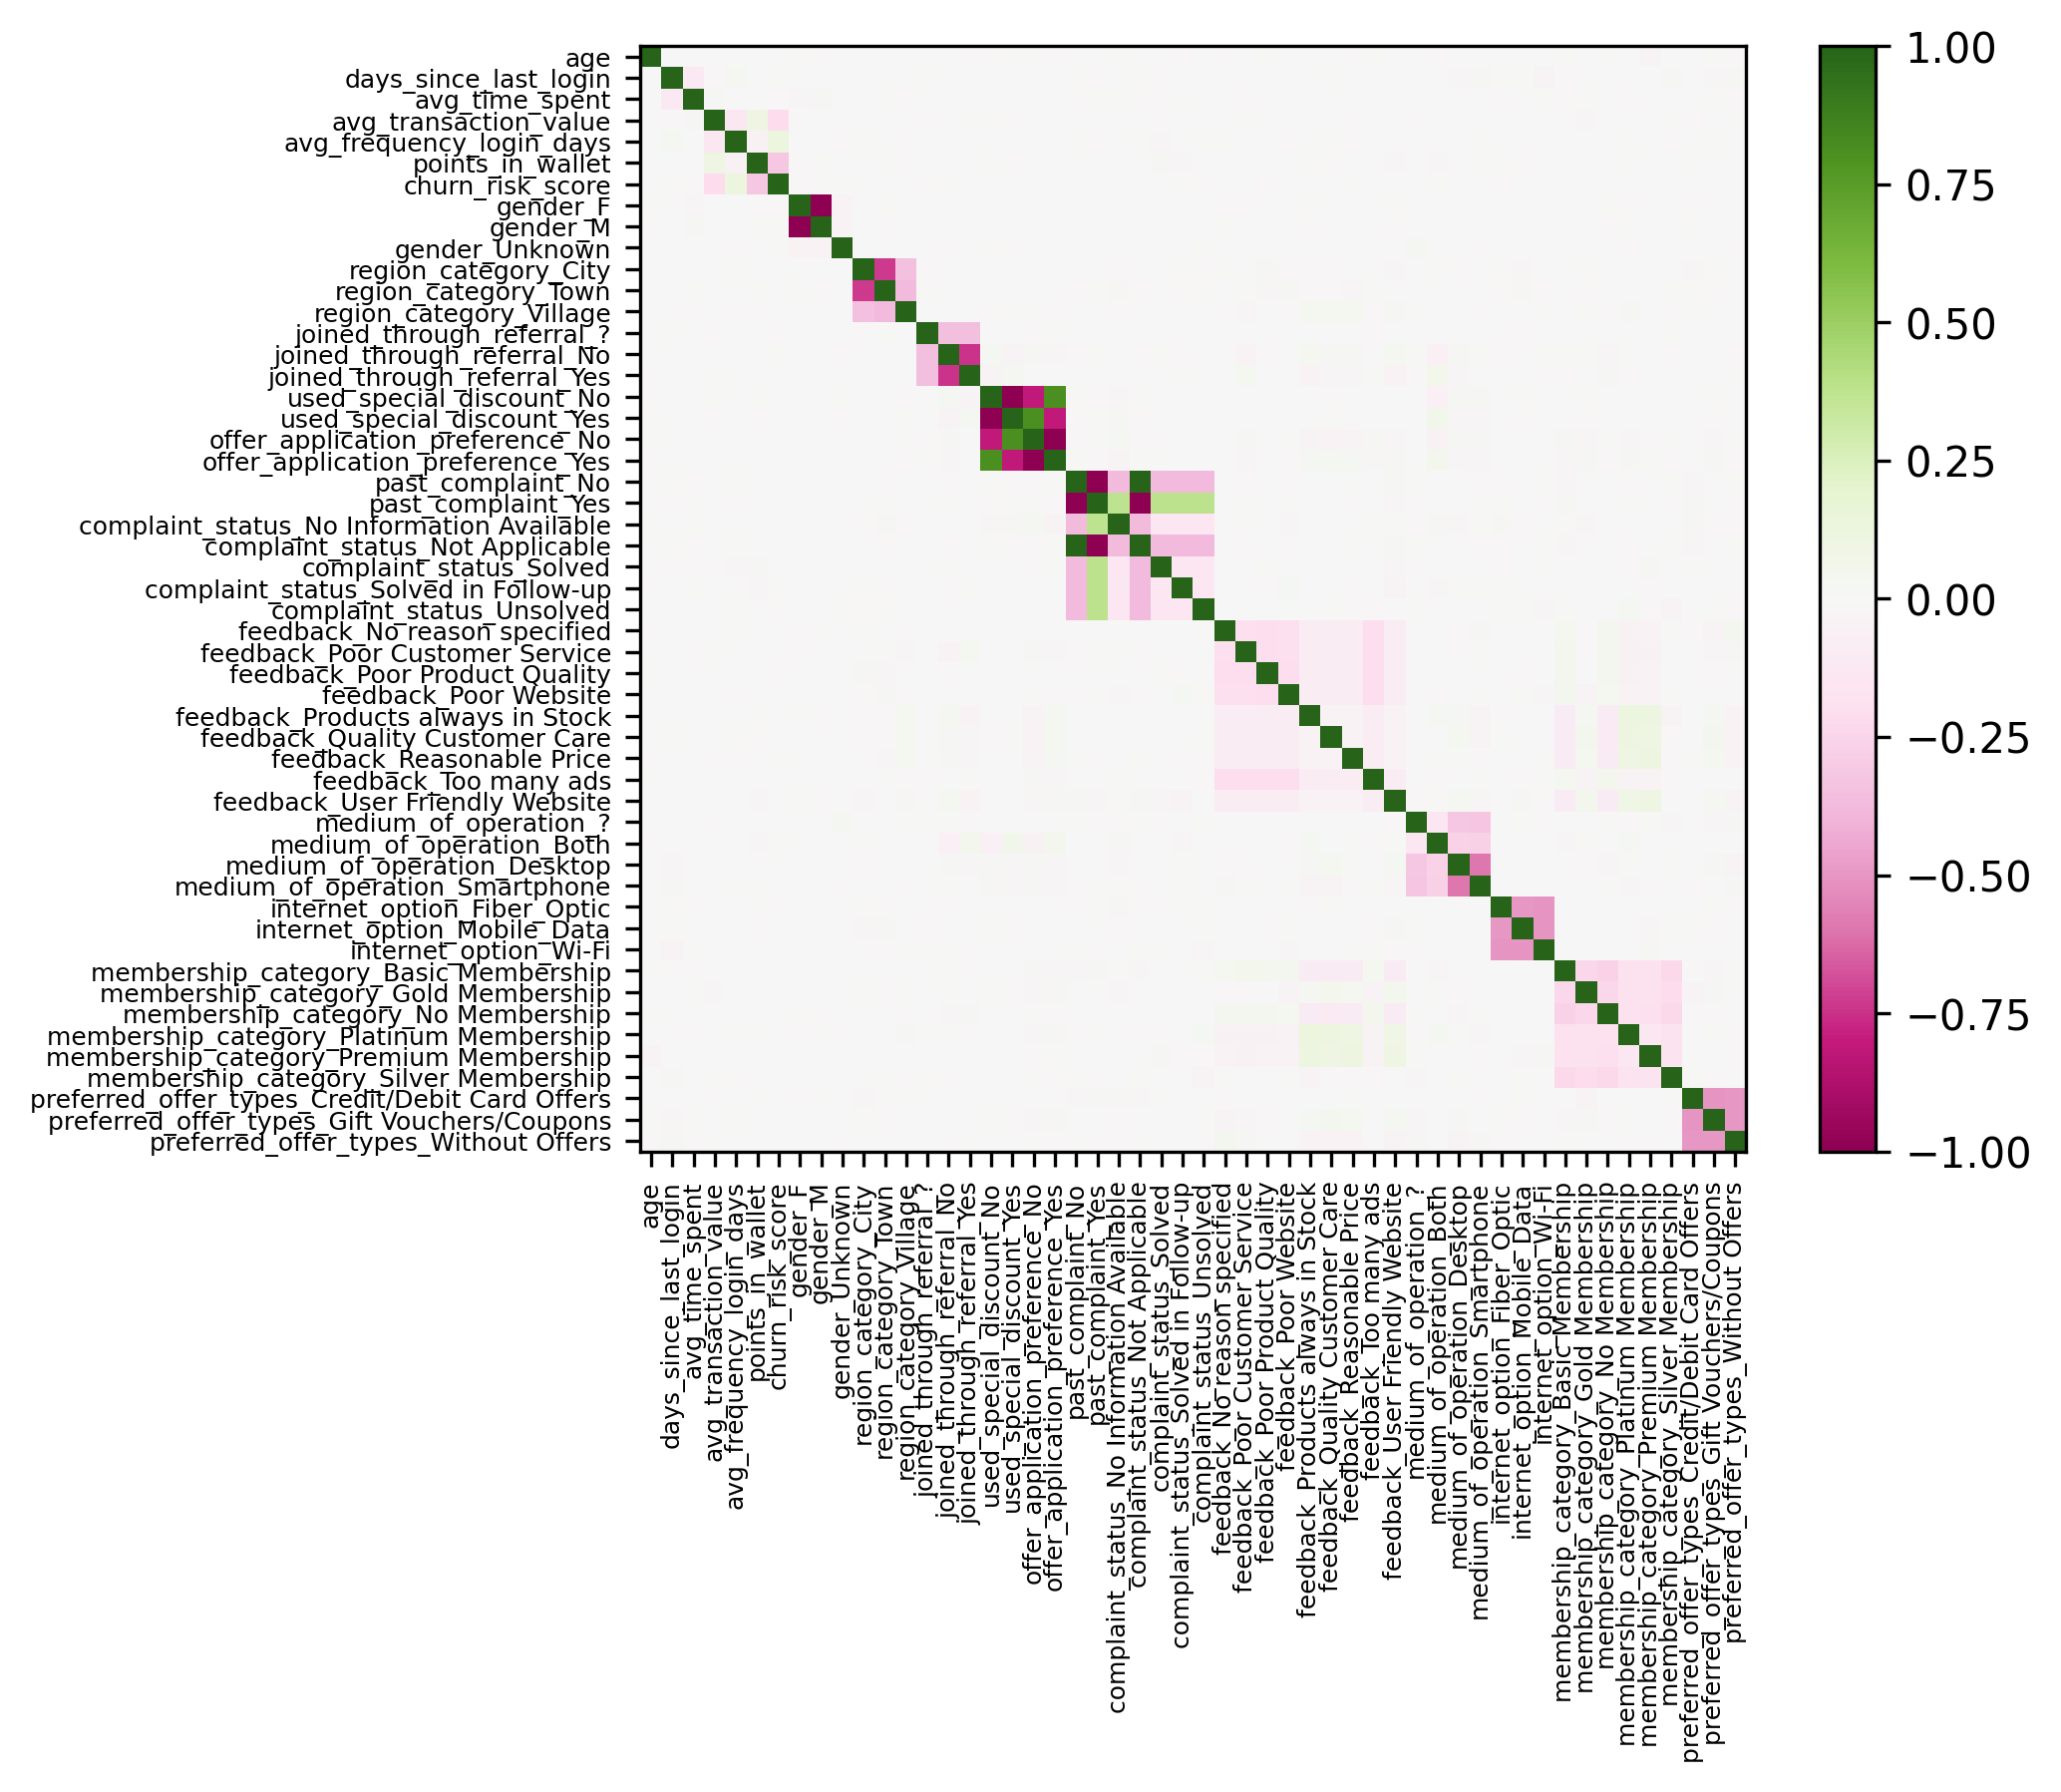

In [51]:
plt.figure(dpi=300)
plt.imshow(num_corr, cmap=plt.get_cmap("PiYG"), vmin=-1, vmax=1) # Pour se convaincre qu'il y a bien de la corrélation
plt.xticks(range(len(numeric_df.columns)), numeric_df.columns, fontsize=6, rotation=90)
plt.yticks(range(len(numeric_df.columns)), numeric_df.columns, fontsize=6)
plt.colorbar()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

numeric_df_without_na = numeric_df.dropna(inplace=False)
features = numeric_df_without_na.drop('churn_risk_score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, numeric_df_without_na.churn_risk_score, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7021648044692738
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.65      1330
         1.0       0.69      0.80      0.74      1534

    accuracy                           0.70      2864
   macro avg       0.71      0.69      0.69      2864
weighted avg       0.70      0.70      0.70      2864



In [53]:
from lime import lime_tabular

def predict_fn(model):
  def predict_proba(X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = model(X_tensor).numpy()
        proba = np.hstack((1 - outputs, outputs))
        return proba
  return predict_proba

df = load_transform("math")

X, y = prepare_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = train_logistic_regression(X_train, y_train)

def explain(model, df, index):
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=X_train.numpy(),
        feature_names=df.columns,
        class_names=['Not Passed', 'Passed'],
        mode='classification')

    instance = X_test[index].numpy().reshape(1, -1)
    exp = explainer.explain_instance(instance[0], predict_fn(model), num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)
explain(model, df, 0)

NameError: name 'load_transform' is not defined

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

reduced_df = reduced_df.dropna(inplace=False)
features = reduced_df.drop('churn_risk_score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, reduced_df.churn_risk_score, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7119413407821229
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.59      0.66      1330
         1.0       0.70      0.81      0.75      1534

    accuracy                           0.71      2864
   macro avg       0.72      0.70      0.70      2864
weighted avg       0.72      0.71      0.71      2864



/home/badbben/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#train a random forest classifier